<a href="https://colab.research.google.com/github/newgirlcarol/TFB103/blob/main/examples/vision/ipynb/mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [5]:
# dropout setting = 0.5
model_dropout5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_dropout5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

drop5 = model_dropout5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, workers=3)

Epoch 1/10
422/422 [==============================] - 5s 10ms/step - loss: 0.3668 - accuracy: 0.8862 - val_loss: 0.0847 - val_accuracy: 0.9760
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.1207 - accuracy: 0.9628 - val_loss: 0.0591 - val_accuracy: 0.9837
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0905 - accuracy: 0.9724 - val_loss: 0.0483 - val_accuracy: 0.9868
Epoch 4/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0745 - accuracy: 0.9767 - val_loss: 0.0450 - val_accuracy: 0.9873
Epoch 5/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0671 - accuracy: 0.9796 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0580 - accuracy: 0.9816 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 7/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0534 - accuracy: 0.9832 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch

In [6]:
# dropout setting = 0.2
model_dropout2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_dropout2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

drop2 = model_dropout2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, workers=3)

Epoch 1/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3268 - accuracy: 0.9060 - val_loss: 0.0762 - val_accuracy: 0.9785
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0883 - accuracy: 0.9734 - val_loss: 0.0579 - val_accuracy: 0.9830
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.0422 - val_accuracy: 0.9877
Epoch 4/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 5/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 7/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 

In [7]:
model_BN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_BN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

bn = model_BN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, workers=3)

Epoch 1/10
422/422 [==============================] - 5s 9ms/step - loss: 0.2279 - accuracy: 0.9342 - val_loss: 0.0696 - val_accuracy: 0.9808
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch 4/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0430 - val_accuracy: 0.9870
Epoch 5/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 7/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0435 - val_accuracy: 0.9877
Epoch 

## Show models accuracy

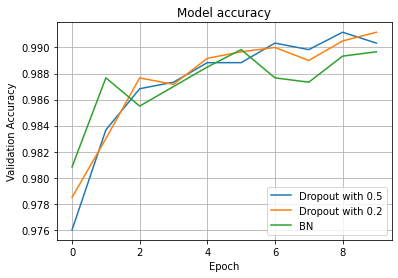

In [10]:
# 比較多種模型準確度
from matplotlib import pyplot as plt
plt.plot(drop5.history['val_accuracy'])
plt.plot(drop2.history['val_accuracy'])
plt.plot(bn.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Dropout with 0.5', 'Dropout with 0.2', 'BN'], loc='lower right')
plt.grid(True)
plt.show()

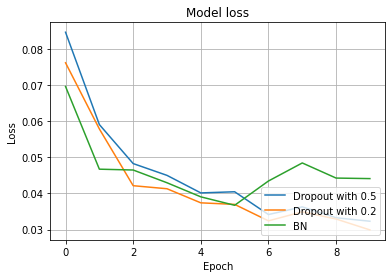

In [11]:
# 繪出每迭代的損失

plt.plot(drop5.history['val_loss'])
plt.plot(drop2.history['val_loss'])
plt.plot(bn.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Dropout with 0.5', 'Dropout with 0.2', 'BN'], loc='lower right')
plt.grid(True)
plt.show()

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])